### **Librerias principales**

In [856]:
import matplotlib.pyplot as plt
import numpy as np
import random
from scipy.stats import mode


Iniciamos con el planteamiento del problema a resolver: en este caso, la predicción de un punto dado un conjunto de datos. Posteriormente, pasaremos a la implementación de una propuesta de solución, que será el algoritmo kNN. Este se implementará a través de fuerza bruta y de forma optimizada.

### **Distancias entre la muestra**

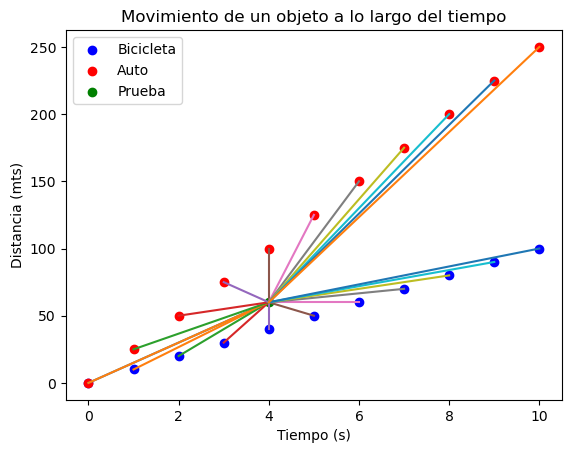

In [857]:
tiempo = [i for i in range(11)]
muestra = (4, 60)
distancia1 = [i * 10 for i in range(11)]
distancia2 = [i * 25 for i in range(11)]

plt.scatter(tiempo, distancia1, color='blue')
plt.scatter(tiempo, distancia2, color='red')
plt.scatter(muestra[0], muestra[1], color='green')

for i in range(len(tiempo)):
    plt.plot((tiempo[i], muestra[0]), (distancia1[i], muestra[1]))

for i in range(len(tiempo)):
    plt.plot((tiempo[i], muestra[0]), (distancia2[i], muestra[1]))

plt.xlabel('Tiempo (s)')
plt.ylabel('Distancia (mts)')
plt.title('Movimiento de un objeto a lo largo del tiempo')

plt.legend(["Bicicleta", "Auto", "Prueba" ])

plt.show()

### **Muestra con k elementos cercanos**

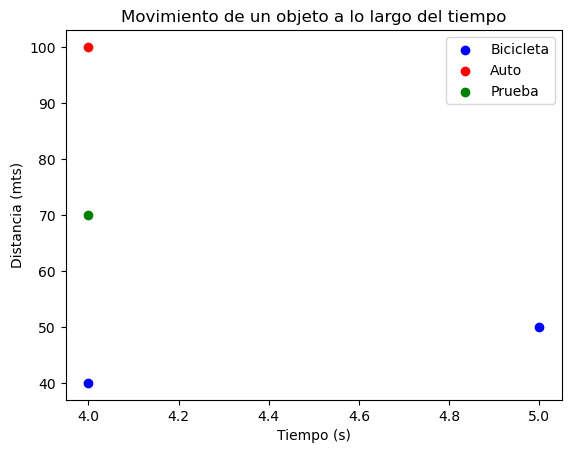

In [858]:
tiempo = [i for i in range(3,6)]
muestra = (4, 70)
distancia1 = [i * 10 for i in range(11)]
distancia2 = [i * 25 for i in range(11)]

distancia1 = distancia1[4:6]
distancia2 = distancia2[4:6]
tiempo = tiempo[1:]
plt.scatter(tiempo, distancia1, color='blue')


plt.scatter(tiempo[0], distancia2[0], color='red')
plt.scatter(muestra[0], muestra[1], color='green')

plt.xlabel('Tiempo (s)')
plt.ylabel('Distancia (mts)')
plt.title('Movimiento de un objeto a lo largo del tiempo')
plt.legend(["Bicicleta", "Auto", "Prueba" ])

plt.show()

### **Iris DataSet**

In [859]:
from sklearn.datasets import load_iris

iris = load_iris()
x_data = iris.data
y_lbl = iris.target
classes = iris.target_names
characteristics = iris.feature_names

In [860]:
print("Caracteristicas:",characteristics)
print("Clases: ", classes)

Caracteristicas: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Clases:  ['setosa' 'versicolor' 'virginica']


### **Etiquetas numericas para las clases**

In [861]:
y_lbl

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [862]:
unique_values = np.unique(y_lbl)

print(f"Valores en y_lbl: {unique_values}")

total_class = [np.count_nonzero(y_lbl == unique_values[i]) for i in unique_values]

print(f"Numero de datos por clase:")

for i in range(len(total_class)):
    print(f"\t{total_class[i]} elementos en clase {i + 1}")

Valores en y_lbl: [0 1 2]
Numero de datos por clase:
	50 elementos en clase 1
	50 elementos en clase 2
	50 elementos en clase 3


In [863]:
print(y_lbl == unique_values[0])

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False]


In [864]:
print(x_data[:10])
print(x_data.shape)
print(total_class)
print()
print("0:50\n50:100\n100:150")

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
(150, 4)
[50, 50, 50]

0:50
50:100
100:150


In [865]:
steps = [sum(total_class[:i+1]) for i in range(len(total_class))]
steps.append(0)
x = [x_data[steps[i - 1]:steps[i]] for i in range(len(steps) - 1)]

In [866]:
x_1 = x_data[:50]
x_2 = x_data[50:100]
x_3 = x_data[100:]

In [867]:
print(f"Dimensión de x_1: {x_1.shape}")
print(f"Dimensión de x_2: {x_2.shape}")
print(f"Dimensión de x_3: {x_3.shape}")

Dimensión de x_1: (50, 4)
Dimensión de x_2: (50, 4)
Dimensión de x_3: (50, 4)


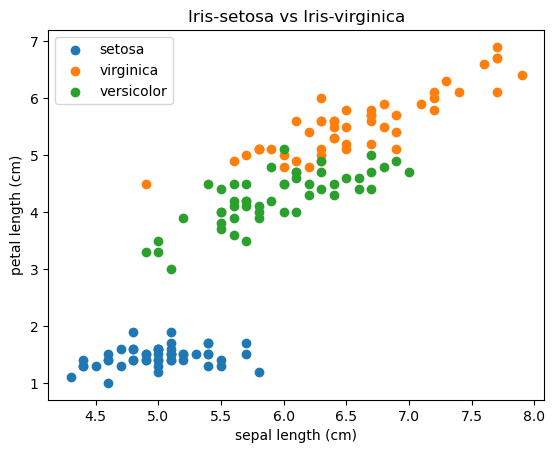

In [868]:
eje_x = 0
eje_y = 2
clase1 = 0
clase2 = 2
clase3 = 1

plt.scatter(x[clase1][:,eje_x], x[clase1][:,eje_y])
plt.scatter(x[clase2][:,eje_x], x[clase2][:,eje_y])
plt.scatter(x[clase3][:,eje_x], x[clase3][:,eje_y])

plt.title(f"Iris-{classes[clase1]} vs Iris-{classes[clase2]}")
plt.xlabel(characteristics[eje_x])
plt.ylabel(characteristics[eje_y])
plt.legend([classes[clase1], classes[clase2], classes[clase3]])

plt.show()

### **Query**

In [869]:
percent_query = 20

nume_samples_query = int((len(x_data) * percent_query)/100) 
query_index_samples = np.random.choice(149, nume_samples_query, replace=False)                                                      
query_samples = x_data[query_index_samples]   

### **Training**

In [870]:
training_samples = np.delete(x_data, query_index_samples, axis=0)

### **Labels**

In [871]:
query_sample_lbl = y_lbl[query_index_samples]
training_sample_lbl = np.delete(y_lbl, query_index_samples, axis=0)

### **Fuerza bruta**

In [872]:
k =  5
predictions = []
for i in range(len(query_samples)):
    distancias = []
    for j in range(len(training_samples)):
        distancia = ((query_samples[i][0] - training_samples[j][0]) ** 2 +
                        (query_samples[i][1] - training_samples[j][1]) ** 2 +
                        (query_samples[i][2] - training_samples[j][2]) ** 2 +
                        (query_samples[i][3] - training_samples[j][3]) ** 2)
        distancia = distancia ** .5
        distancias.append(distancia)
    distancias = np.array(distancias)
    sort_index = np.argsort(distancias)                                    
    k_index = sort_index[:k]
    k_labels = training_sample_lbl[k_index]

    vals, counts = np.unique(k_labels, return_counts=True)
    mode_label = vals[np.argmax(counts)]
    predictions.append(mode_label)

In [873]:
print(f"Predicciones: {np.array(predictions)}")

Predicciones: [0 1 0 1 0 0 2 1 2 1 2 0 1 1 0 1 0 0 1 1 1 0 1 1 1 0 1 2 2 2]


In [874]:
print(f"Valores reales: {query_sample_lbl}")

Valores reales: [0 1 0 1 0 0 2 1 2 1 2 0 2 1 0 1 0 0 1 1 1 0 1 2 1 0 1 2 2 2]


### **Optimizado**

In [875]:
k =  5
predictions = []
for i in range(len(query_samples)):
    Q = np.tile(query_samples[i,:],(training_samples.shape[0],1))              
    Z = Q - training_samples                                                        
    S = Z @ Z.T                                                        
    distancia_S = np.diag(S) ** (1 / 2)    
    sort_index = np.argsort(distancia_S)                                    
    k_index = sort_index[:k]
    k_labels = training_sample_lbl[k_index]

    vals, counts = np.unique(k_labels, return_counts=True)
    mode_label = vals[np.argmax(counts)]
    predictions.append(mode_label)

In [876]:
print(f"Predicciones: {np.array(predictions)}")

Predicciones: [0 1 0 1 0 0 2 1 2 1 2 0 1 1 0 1 0 0 1 1 1 0 1 1 1 0 1 2 2 2]


In [877]:
print(f"Valores reales: {query_sample_lbl}")

Valores reales: [0 1 0 1 0 0 2 1 2 1 2 0 2 1 0 1 0 0 1 1 1 0 1 2 1 0 1 2 2 2]
